In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import uniform, norm, binom, t

In [47]:
path = "C:/Users/julia/Downloads/debugging.csv"
debugging = pd.read_csv(path)
debugging.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


In [48]:
debugging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Bug ID                     2098 non-null   int64  
 1   Time Taken to fix the bug  2098 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 32.9 KB


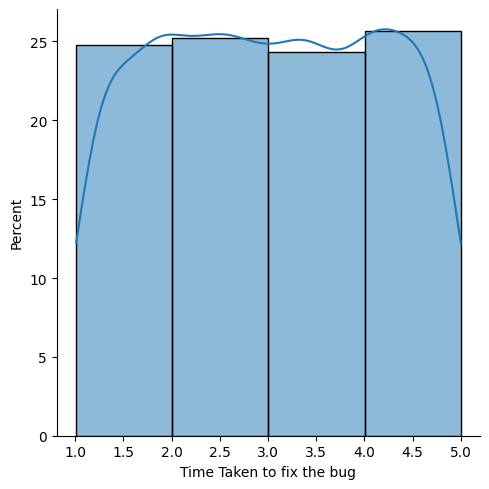

In [49]:
sns.displot(data = debugging, x = 'Time Taken to fix the bug', kde = True, stat = 'percent', bins = 4 )
plt.show()

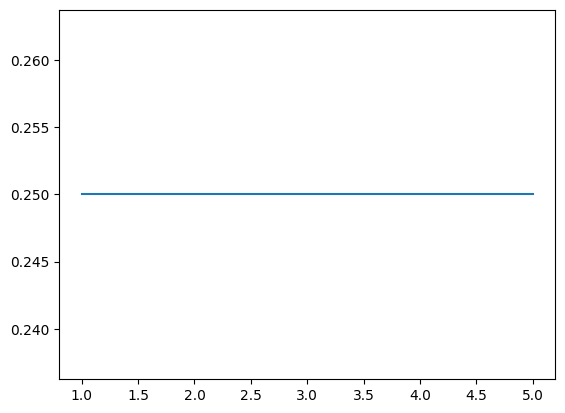

In [50]:
xspace = np.linspace(1, 5, 50)
pos = uniform.pdf(x = xspace, loc = 1, scale = 4)
sns.lineplot(x = xspace, y = pos)
plt.show()

In [51]:
help(uniform.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.uniform_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



In [52]:
uniform.cdf(x = 2, loc = 1, scale = 4)

0.25

In [53]:
1 - uniform.cdf(x = 4.2, loc = 1, scale = 4)

0.19999999999999996

In [54]:
x = np.linspace(0, 10, 50)

In [55]:
path1 = "C:/Users/julia/Downloads/sat_score.csv"
sat_score = pd.read_csv(path1)
sat_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  1000 non-null   int64
 1   score       1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [56]:
mu = sat_score.score.mean()
standard = sat_score.score.std()
pos750 = norm.cdf(x = 750, loc = mu, scale = standard)
pos750

0.10393774696096802

In [57]:
norm.ppf(q = 0.95, loc = mu, scale = standard)

1343.7108592761278

In [58]:
norm.ppf(q = 0.9, loc = mu, scale = standard)

1269.4424694794877

In [59]:
score = pd.DataFrame(data ={'Subject': ['Physics', 'History', 'Computer science'], 'Marks Score' : [56.88, 77.1, 35.55], 'Out of': [80, 100, 50], 'Mean': [47.5, 77, 33], 'Standard deviation': [12.3, 8.2, 7.3]})
score

,Subject,Marks Score,Out of,Mean,Standard deviation
0,Physics,56.88,80,47.5,12.3
1,History,77.10,100,77.0,8.2
2,Computer science,35.55,50,33.0,7.3


In [60]:
z_score = (score['Marks Score'] - score['Mean']) / score['Standard deviation']

In [61]:
score["z_score"] = z_score
z_max = score.z_score.max()
cond = score.z_score == z_max
score[cond].Subject

0    Physics
Name: Subject, dtype: object

In [62]:
norm.cdf(x = 67000, loc = 55000, scale = 6200)-norm.cdf(x = 59000, loc = 55000, scale = 6200)

0.23294586132016037

In [63]:
np.random.seed(1)

In [64]:
uniform_pop = uniform.rvs(loc = 0, scale = 10, size = 100000)
uniform_pop

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, ...,
       8.18045836e+00, 5.67853567e+00, 6.13057425e+00])

(array([10138.,  9983., 10209.,  9850.,  9834., 10043.,  9993.,  9960.,
         9923., 10067.]),
 array([1.03693822e-04, 1.00008361e+00, 2.00006352e+00, 3.00004344e+00,
        4.00002335e+00, 5.00000327e+00, 5.99998318e+00, 6.99996310e+00,
        7.99994301e+00, 8.99992293e+00, 9.99990284e+00]),
 <BarContainer object of 10 artists>)

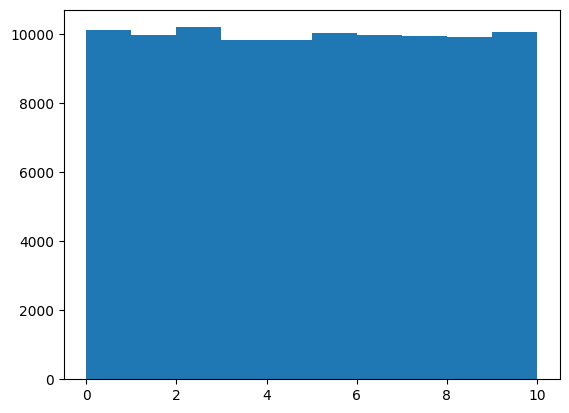

In [65]:
plt.hist(uniform_pop)

In [66]:
from scipy.stats import t
x_bar = 180
sigma = 6
t.interval(confidence = 0.95, df = 99, loc = x_bar, scale = sigma/ np.sqrt(100))

(178.80946982909478, 181.19053017090522)

In [67]:
norm.interval(confidence= 0.95, loc = 1000, scale = 200/ np.sqrt(100))

(960.8007203091989, 1039.1992796908012)

In [68]:
t.interval(confidence = 0.95, df = 49, loc = 160.9, scale = 6/np.sqrt(50))

(159.19481886702562, 162.6051811329744)

In [69]:
0.2/np.sqrt(35)

0.033806170189140665

In [70]:
norm.cdf(590, 502, 115) - norm.cdf(400, 502, 115)

0.5903777927789047

In [71]:
import scipy.stats as stats

In [72]:
daily_intake = np.array([5260, 5070,3640,1180, 1390,6515,6805,2015,4515,1230,1770])
stats.ttest_1samp(daily_intake, popmean= 7752)

TtestResult(statistic=-6.398908019819394, pvalue=7.843455779613616e-05, df=10)

In [73]:
energy = np.array([[9.21, 0],[7.53, 1],[7.48, 1],[8.08, 1],[8.09, 1],[10.15, 1],[8.40, 1],[0.88, 1],[1.13, 1],[2.90,1],[11.51, 0],[2.79, 0],[7.05, 1],[1.85, 0],[19.97,0],[7.48, 1],[8.79, 0],[9.69,0],[2.68,0],[3.58,1],[9.19,0],[4.11,1]])
group1 = energy[:, 1] == 0
group1 = energy[group1][:, 0]
group2 = energy[:, 1] == 1
group2 = energy[group2][:, 0]
stats.ttest_ind(group1, group2, equal_var= True)


TtestResult(statistic=1.353100293687127, pvalue=0.19112194470967464, df=20.0)

In [74]:
energy = np.array([[49, 0], [53, 1], [56,1], [43,1], [45, 1],[53,1],[45,1],[56,1], [51, 0], [43,0], [47, 1],[44, 0], [51, 0],[53, 1], [50, 0], [54, 0],[51, 0], [51, 1], [46, 0],[47, 1]])
group1 = energy[:, 1] == 0
group1 = energy[group1][:,0]
group2 = energy[:, 1] == 1
group2 = energy[group2][:,0]
stats.ttest_ind(group1, group2, equal_var= False)

TtestResult(statistic=-0.607694899652158, pvalue=0.5509860214402561, df=17.98688825272457)

In [75]:
a = ['a','b','c']
b= 'hello'
a.extend(b)
a


['a', 'b', 'c', 'h', 'e', 'l', 'l', 'o']

In [76]:
l = [1, 2, 3, 4,5,6,7,8,9,10]
print(l[::2])

[1, 3, 5, 7, 9]


In [77]:
em = {1:{'name':'J', 'age':'35'}, 2:{'name':'p', 'age':'37'}}
em[1]['age']

'35'

In [78]:
var = 10
for i in range(5):
    for j in range(2, 5, 1):
        if var % 2 == 0:
            continue
            var += 1
    var+=1
print(var)

15


In [79]:
def f(x):
    def f1(*args, **kwargs):
           print("Hello")
           return x(*args, **kwargs)
    return f1

In [80]:
f(8)

<function __main__.f.<locals>.f1(*args, **kwargs)>

In [81]:
60 - 10* 1.5

45.0

In [82]:
70 + 10 * 1.5

85.0

In [83]:
n = [48, 50, 54, 54, 58, 60]
np.mean(n)
np.median(n)

54.0

In [84]:
8/9

0.8888888888888888

In [85]:

# energy expenditure in mJ and stature (0=obese, 1=lean)
energ = np.array([[9.21, 0],[7.53, 1],[7.48, 1],[8.08, 1],[8.09, 1],[10.15, 1],[8.40, 1],[0.88, 1],[1.13, 1],[2.90, 1],[11.51, 0],[2.79, 0],[7.05, 1],[1.85, 0],[19.97, 0],[7.48, 1],[8.79, 0],[9.69, 0],[2.68, 0],[3.58, 1],[9.19, 0],[4.11, 1]])

# Separating the data into 2 groups
group1 = energ[:, 1] == 0 # Extracting the elements of the array where obese == True
group1 = energ[group1][:, 0] # Extracting the energy expenditure of obese
group2 = energ[:, 1] == 1 # Extracting the elements of the array where lean == True
group2 = energ[group2][:, 0] # Extracting the energy expenditure of lean

# Applying T-test to check if the energy expenditure of obese and lean is indeed different.
stats.ttest_ind(group1, group2, equal_var = True)

TtestResult(statistic=1.353100293687127, pvalue=0.19112194470967464, df=20.0)

In [86]:
intake = np.array([[5260, 2400],[7500, 5500],[5640, 3885],[6180, 3160],[6390, 5645],[6515, 8680],[6805, 9265],[7515, 5975],[7515, 2790],[8230, 1900],[8770, 1335]])
# Separating data into 2 groups

pre = intake[:, 1] # Extracting the pre intake values from array
post = intake[:, 0] # Extracting the post intake values from array

stats.ttest_rel(post, pre, alternative = 'greater') # Applying T-test to check if the post intake is greater than pre intake

TtestResult(statistic=2.518703923850169, pvalue=0.015227457461554865, df=10)

In [87]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(129, 150, value = 0.9, alternative = 'smaller')

(-1.4118624160050361, 0.07899523801234237)

In [112]:
import numpy as np
np.random.seed(1)

vec1 = np.array([0, 0, 0])
mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
sample_for_class1 = np.random.multivariate_normal(vec1, mat1, 20).T
assert sample_for_class1.shape == (3, 20), "The dimension of the sample_for_class1 matrix is not 3x20"

vec2 = np.array([1, 1, 1])
mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
sample_for_class2 = np.random.multivariate_normal(vec2, mat2, 20).T
assert sample_for_class2.shape == (3, 20), "The dimension of the sample_for_class2 matrix is not 3x20"

all_data = np.concatenate((sample_for_class1, sample_for_class2), axis=1)
assert all_data.shape == (3, 40), "The dimension of the all_data matrix is not 3x20"

In [113]:
all_data

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208,
         0.24560206,  0.70190716,  2.13162939, -0.39649634,  1.16003707,
        -1.02220122,  1.23009474,  0.79924193,  1.19829972,  1.37756379,
         2.19891788,  0.36126959,  0.65614632,  1.69803203,  1.40349164,
         1.16938243,  0.73378149,  1.31515939,  1.35054598, -0.61577235],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733,
         2.25286816,  1.48851815,  2.51981682, -0.44411381,  1.87616892,
         0.69379599,  1.76201118,  1.18656139,  1.

In [114]:
mean_dim1 = np.mean(all_data[0, :])
mean_dim2 = np.mean(all_data[1, :])
mean_dim3 = np.mean(all_data[2, :])

mean_vector = np.array([[mean_dim1], [mean_dim2], [mean_dim3]])

print('The Mean Vector:\n', mean_vector)

scatter_matrix = np.zeros((3,3))
for i in range(all_data.shape[1]):
    scatter_matrix += (all_data[:, i].reshape(3, 1) - mean_vector).dot((all_data[:, i].reshape(3, 1) - mean_vector).T)
print('The Scatter Matrix is :\n', scatter_matrix)

The Mean Vector:
 [[0.41667492]
 [0.69848315]
 [0.49242335]]
The Scatter Matrix is :
 [[38.4878051  10.50787213 11.13746016]
 [10.50787213 36.23651274 11.96598642]
 [11.13746016 11.96598642 49.73596619]]


In [117]:
eig_val, eig_vec = np.linalg.eig(scatter_matrix)
eig_val

array([65.16936779, 32.69471296, 26.59620328])

In [118]:
eig_vec

array([[-0.49210223, -0.64670286,  0.58276136],
       [-0.47927902, -0.35756937, -0.8015209 ],
       [-0.72672348,  0.67373552,  0.13399043]])

In [119]:
for ev in eig_vec:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [128]:
# We Make a list of tuple containing (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# We then Sort list of tuples by the eigenvalue
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# verify that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

65.16936779078195
32.69471296321799
26.596203282097097


In [127]:
eig_pairs.sort()

[(65.16936779078195, array([-0.49210223, -0.47927902, -0.72672348])),
 (32.69471296321799, array([-0.64670286, -0.35756937,  0.67373552])),
 (26.596203282097097, array([ 0.58276136, -0.8015209 ,  0.13399043]))]

In [131]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]
